On our third laboratory classes we build more complex shallow network model - we create a new layer and run some test on it. In this report I will do something similar that I did in previous summary - I will change some parameters (or add some layers) and see how will the model response.

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


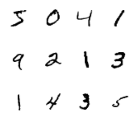

In [4]:
plt.figure(figsize=(2,2))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

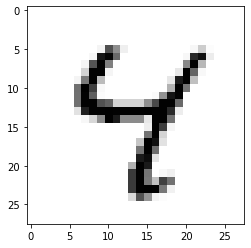

In [6]:
_ = plt.imshow(X_valid[6], cmap='Greys')

In [7]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [8]:
X_train.shape

(60000, 784)

In [9]:
y_train.shape

(60000,)

In [10]:
X_valid.shape

(10000, 784)

In [11]:
X_train /= 255
X_valid /= 255

In [12]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output layer

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2861 - accuracy: 0.9172 - val_loss: 0.2737 - val_accuracy: 0.9216
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2763 - accuracy: 0.9198 - val_loss: 0.2632 - val_accuracy: 0.9234
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2678 - accuracy: 0.9228 - val_loss: 0.2584 - val_accuracy: 0.9249
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2600 - accuracy: 0.9247 - val_loss: 0.2488 - val_accuracy: 0.9272
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2530 - accuracy: 0.9265 - val_loss: 0.2456 - val_accuracy: 0.9287
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2464 - accuracy: 0.9283 - val_loss: 0.2396 - val_accuracy: 0.9300
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2398 - accuracy: 0.9313 - val_loss: 0.2353 - val_accuracy: 0.9314
Epoch 

This is my basic model for my tests. This model get 94% accuracy, with loss at level of 0.1756.

# Model 1 - one additional layer

In [21]:
model1 = Sequential()
model1.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax')) #output layer

In [23]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [25]:
model1.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.6542 - accuracy: 0.5271 - val_loss: 0.8741 - val_accuracy: 0.7472
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6412 - accuracy: 0.8198 - val_loss: 0.4774 - val_accuracy: 0.8654
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4284 - accuracy: 0.8786 - val_loss: 0.3744 - val_accuracy: 0.8947
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3610 - accuracy: 0.8947 - val_loss: 0.3298 - val_accuracy: 0.9052
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.9053 - val_loss: 0.3153 - val_accuracy: 0.9092
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3070 - accuracy: 0.9104 - val_loss: 0.3032 - val_accuracy: 0.9122
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2906 - accuracy: 0.9158 - val_loss: 0.2802 - val_accuracy: 0.9203
Epoch 

simillar result

# Model 2

In [26]:
model2 = Sequential()
model2.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax')) #output layer

In [27]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [29]:
model2.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 1.8810 - accuracy: 0.4265 - val_loss: 1.1496 - val_accuracy: 0.6372
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7245 - accuracy: 0.7779 - val_loss: 0.5257 - val_accuracy: 0.8421
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4777 - accuracy: 0.8562 - val_loss: 0.4211 - val_accuracy: 0.8721
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4152 - accuracy: 0.8762 - val_loss: 0.3955 - val_accuracy: 0.8820
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3725 - accuracy: 0.8901 - val_loss: 0.3505 - val_accuracy: 0.8949
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3420 - accuracy: 0.8992 - val_loss: 0.3229 - val_accuracy: 0.9054
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3173 - accuracy: 0.9060 - val_loss: 0.3072 - val_accuracy: 0.9079
Epoch 

slighty better

# Model 3


In [30]:
model3 = Sequential()
model3.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax')) #output layer

In [31]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 67,530
Trainable params: 67,530
Non-trai

In [32]:
model3.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [33]:
model3.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8044 - accuracy: 0.4194 - val_loss: 1.0223 - val_accuracy: 0.6653
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6514 - accuracy: 0.7936 - val_loss: 0.5092 - val_accuracy: 0.8404
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4476 - accuracy: 0.8654 - val_loss: 0.3878 - val_accuracy: 0.8826
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3792 - accuracy: 0.8861 - val_loss: 0.3312 - val_accuracy: 0.9038
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3352 - accuracy: 0.9007 - val_loss: 0.3027 - val_accuracy: 0.9092
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3038 - accuracy: 0.9091 - val_loss: 0.2825 - val_accuracy: 0.9156
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2805 - accuracy: 0.9167 - val_loss: 0.2729 - val_accuracy: 0.9205
Epoch 

# Model 4

In [34]:
model4 = Sequential()
model4.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax')) #output layer

In [35]:
model4.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [36]:
model4.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 1.8095 - accuracy: 0.3555 - val_loss: 0.9031 - val_accuracy: 0.6876
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6936 - accuracy: 0.7706 - val_loss: 0.4978 - val_accuracy: 0.8531
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4685 - accuracy: 0.8554 - val_loss: 0.4413 - val_accuracy: 0.8570
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3844 - accuracy: 0.8834 - val_loss: 0.3572 - val_accuracy: 0.8842
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3356 - accuracy: 0.8986 - val_loss: 0.3182 - val_accuracy: 0.9027
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3041 - accuracy: 0.9073 - val_loss: 0.2988 - val_accuracy: 0.9080
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2774 - accuracy: 0.9145 - val_loss: 0.2674 - val_accuracy: 0.9168
Epoch 

# Model 5

In [37]:
model5 = Sequential()
model5.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(10, activation='softmax')) #output layer

In [38]:
model5.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [39]:
model5.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 2.0709 - accuracy: 0.2306 - val_loss: 1.5404 - val_accuracy: 0.3722
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0300 - accuracy: 0.6298 - val_loss: 0.6778 - val_accuracy: 0.7816
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5821 - accuracy: 0.8148 - val_loss: 0.4198 - val_accuracy: 0.8704
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3920 - accuracy: 0.8798 - val_loss: 0.3362 - val_accuracy: 0.8950
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3152 - accuracy: 0.9035 - val_loss: 0.3138 - val_accuracy: 0.9011
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2753 - accuracy: 0.9164 - val_loss: 0.2532 - val_accuracy: 0.9221
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2480 - accuracy: 0.9238 - val_loss: 0.2353 - val_accuracy: 0.9289
Epoch 

# Test 1 - summary

My goal was to create the number of layers, when the model's performace will get worse with next layers - surprisingly it didn't happend. Of course, the fitting of model with 20 epochs cannot be a measurable test, but it seemed there that the more layers the better result. Sad for us, as we were thought on our lectures and lab classes, it is not true. We have to be careful not to overtrain - it can be misleading to add more and more layers. We have to find this perfect or the closest to perfect number to get the best performance possible for our data and model. In my case with every new model the accuracy grew and model seemed to work better, but as I wrote earier my goal was to find this sweetspot. Unfortunately, I didn't find it.   

# Model I - changing the number of neurons in layers

in this case I will be working on the same number of layers 

In [47]:
model_I = Sequential()
model_I.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model_I.add(Dense(32, activation='relu'))
model_I.add(Dense(10, activation='softmax')) #output layer

In [48]:
model_I.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [49]:
model_I.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7075 - accuracy: 0.5695 - val_loss: 1.0542 - val_accuracy: 0.7454
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.7753 - accuracy: 0.8117 - val_loss: 0.5743 - val_accuracy: 0.8612
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5037 - accuracy: 0.8694 - val_loss: 0.4259 - val_accuracy: 0.8877
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4081 - accuracy: 0.8889 - val_loss: 0.3659 - val_accuracy: 0.8964
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3627 - accuracy: 0.8975 - val_loss: 0.3341 - val_accuracy: 0.9034
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3354 - accuracy: 0.9046 - val_loss: 0.3120 - val_accuracy: 0.9097
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3162 - accuracy: 0.9088 - val_loss: 0.2979 - val_accuracy: 0.9124
Epoch 

# Model II

In [43]:
model_II = Sequential()
model_II.add(Dense(16, activation='sigmoid', input_shape=(784,)))
model_II.add(Dense(16, activation='relu'))
model_II.add(Dense(10, activation='softmax')) #output layer

In [44]:
model_II.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [45]:
model_II.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.9181 - accuracy: 0.4228 - val_loss: 1.4419 - val_accuracy: 0.6020
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 1.1200 - accuracy: 0.6930 - val_loss: 0.8732 - val_accuracy: 0.7618
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7399 - accuracy: 0.7947 - val_loss: 0.6198 - val_accuracy: 0.8287
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5662 - accuracy: 0.8415 - val_loss: 0.5072 - val_accuracy: 0.8562
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4848 - accuracy: 0.8634 - val_loss: 0.4480 - val_accuracy: 0.8743
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8765 - val_loss: 0.4116 - val_accuracy: 0.8838
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4061 - accuracy: 0.8849 - val_loss: 0.3870 - val_accuracy: 0.8899
Epoch 

# Model III

In [50]:
model_III = Sequential()
model_III.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model_III.add(Dense(8, activation='relu'))
model_III.add(Dense(10, activation='softmax')) #output layer

In [51]:
model_III.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [52]:
model_III.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.1382 - accuracy: 0.2882 - val_loss: 1.9086 - val_accuracy: 0.3938
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 1.6376 - accuracy: 0.5305 - val_loss: 1.3649 - val_accuracy: 0.6077
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 1.1703 - accuracy: 0.6478 - val_loss: 0.9854 - val_accuracy: 0.6998
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8704 - accuracy: 0.7361 - val_loss: 0.7532 - val_accuracy: 0.7752
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6968 - accuracy: 0.7984 - val_loss: 0.6259 - val_accuracy: 0.8220
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5955 - accuracy: 0.8313 - val_loss: 0.5457 - val_accuracy: 0.8485
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5322 - accuracy: 0.8508 - val_loss: 0.4959 - val_accuracy: 0.8619
Epoch 

# Model IV

In [53]:
model_IV = Sequential()
model_IV.add(Dense(128, activation='sigmoid', input_shape=(784,)))
model_IV.add(Dense(128, activation='relu'))
model_IV.add(Dense(10, activation='softmax')) #output layer

In [54]:
model_IV.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [55]:
model_IV.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.5327 - accuracy: 0.6333 - val_loss: 0.8103 - val_accuracy: 0.8149
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6168 - accuracy: 0.8436 - val_loss: 0.4787 - val_accuracy: 0.8718
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4419 - accuracy: 0.8808 - val_loss: 0.3877 - val_accuracy: 0.8935
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3797 - accuracy: 0.8935 - val_loss: 0.3491 - val_accuracy: 0.9013
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3483 - accuracy: 0.9007 - val_loss: 0.3254 - val_accuracy: 0.9057
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3285 - accuracy: 0.9056 - val_loss: 0.3128 - val_accuracy: 0.9075
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3142 - accuracy: 0.9095 - val_loss: 0.2989 - val_accuracy: 0.9133
Epoch 

# Test 2 - summary

In this case I was playing with the number of neurons in layers - I was diving or doubling it. The results came as I expected them - with less neurons the accuracy dropped, with the increased number it get bigger; but it was not the big difference - in every case the performace was over 90%. It seems like the number of neurons is not that important in model at this level with this kind of data. Of course, my test cannot give a important answers - it's too small, but I feel it kinda reflects on what I thought about it.

# Model_tan - changing the type of neurons

In [57]:
model_tan = Sequential()
model_tan.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model_tan.add(Dense(64, activation='tanh'))
model_tan.add(Dense(10, activation='softmax')) #output layer

In [58]:
model_tan.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [59]:
model_tan.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.5825 - accuracy: 0.6131 - val_loss: 0.8788 - val_accuracy: 0.8106
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6630 - accuracy: 0.8429 - val_loss: 0.5084 - val_accuracy: 0.8739
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4641 - accuracy: 0.8783 - val_loss: 0.4045 - val_accuracy: 0.8905
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3926 - accuracy: 0.8924 - val_loss: 0.3580 - val_accuracy: 0.9017
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3557 - accuracy: 0.8998 - val_loss: 0.3301 - val_accuracy: 0.9079
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3323 - accuracy: 0.9049 - val_loss: 0.3106 - val_accuracy: 0.9117
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3157 - accuracy: 0.9093 - val_loss: 0.2979 - val_accuracy: 0.9155
Epoch 

# Model_sigm

In [60]:
model_sigm = Sequential()
model_sigm.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model_sigm.add(Dense(64, activation='sigmoid'))
model_sigm.add(Dense(10, activation='softmax')) #output layer

In [61]:
model_sigm.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [62]:
model_sigm.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 2.2508 - accuracy: 0.2571 - val_loss: 2.1826 - val_accuracy: 0.4738
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 2.0616 - accuracy: 0.5249 - val_loss: 1.8836 - val_accuracy: 0.5924
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 1.6571 - accuracy: 0.6213 - val_loss: 1.4148 - val_accuracy: 0.6810
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 1.2431 - accuracy: 0.7124 - val_loss: 1.0636 - val_accuracy: 0.7488
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9532 - accuracy: 0.7748 - val_loss: 0.8306 - val_accuracy: 0.7994
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7696 - accuracy: 0.8112 - val_loss: 0.6886 - val_accuracy: 0.8296
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6551 - accuracy: 0.8351 - val_loss: 0.5966 - val_accuracy: 0.8500
Epoch 

#Model_lin

In [63]:
model_lin = Sequential()
model_lin.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model_lin.add(Dense(64, activation='sigmoid'))
model_lin.add(Dense(10, activation='softmax')) #output layer

In [64]:
model_lin.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

In [65]:
model_lin.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 2.2455 - accuracy: 0.2624 - val_loss: 2.1638 - val_accuracy: 0.4479
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 2.0293 - accuracy: 0.4693 - val_loss: 1.8400 - val_accuracy: 0.5490
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 1.6188 - accuracy: 0.5998 - val_loss: 1.3762 - val_accuracy: 0.6519
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 1.2017 - accuracy: 0.7193 - val_loss: 1.0296 - val_accuracy: 0.7746
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9249 - accuracy: 0.7869 - val_loss: 0.8130 - val_accuracy: 0.8117
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7510 - accuracy: 0.8205 - val_loss: 0.6734 - val_accuracy: 0.8384
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6384 - accuracy: 0.8424 - val_loss: 0.5827 - val_accuracy: 0.8526
Epoch 

# Test 3 - summary

In this case I didn't know what to expect - I just wanted to play with neuron type and see what will happend. It seems like it's not this important in my case. Every type had similar performance and working on this kind of data does not require to make a important decision on type of neurons.

# Conclusion

After running some tests I have the same conlusion as I expected to have - it depends on various parameters and data to create the best model. You have to get this feeling (and of course some research) to be good at making this. Hopefully, I will become an expert in this kind of work :).